In [1]:
#Evaluating Clustering Performance of K-Means Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
inPath = '/Users/emsfl/Downloads/'

In [3]:
inpDf = pd.read_csv(inPath + 'inpFle_BCCP (2).csv', delimiter=',', header=0, index_col=0)

In [4]:
inpDf

,credit_score,isCtry1,isCtry2,isFemale,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
id,,,,,,,,,,,,
2381,619,0,1,1,42,2,0.00,1,1,1,101348.88,1
2382,608,0,0,1,41,1,83807.86,1,0,1,112542.58,0
2383,502,0,1,1,42,8,159660.80,3,1,0,113931.57,1
2384,699,0,1,1,39,1,0.00,2,0,0,93826.63,0
2385,850,0,0,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12376,771,0,1,0,39,5,0.00,2,1,0,96270.64,0
12377,516,0,1,0,35,10,57369.61,1,1,1,101699.77,0
12378,709,0,1,1,36,7,0.00,1,0,1,42085.58,1


In [5]:
#In a new ‘xDf’ DataFrame, drop the ‘churn’ column

xDf = inpDf.drop(columns='churn')

In [6]:
xDf

,credit_score,isCtry1,isCtry2,isFemale,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
id,,,,,,,,,,,
2381,619,0,1,1,42,2,0.00,1,1,1,101348.88
2382,608,0,0,1,41,1,83807.86,1,0,1,112542.58
2383,502,0,1,1,42,8,159660.80,3,1,0,113931.57
2384,699,0,1,1,39,1,0.00,2,0,0,93826.63
2385,850,0,0,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
12376,771,0,1,0,39,5,0.00,2,1,0,96270.64
12377,516,0,1,0,35,10,57369.61,1,1,1,101699.77
12378,709,0,1,1,36,7,0.00,1,0,1,42085.58


In [7]:
#K MEANS ALGORITHM

inertiaLst = []
for kVal in range(1, 16):
    kmeans = KMeans(n_clusters=kVal, n_init=10)
    kmeans.fit(xDf)
    inertiaLst.append([kVal, kmeans.inertia_])

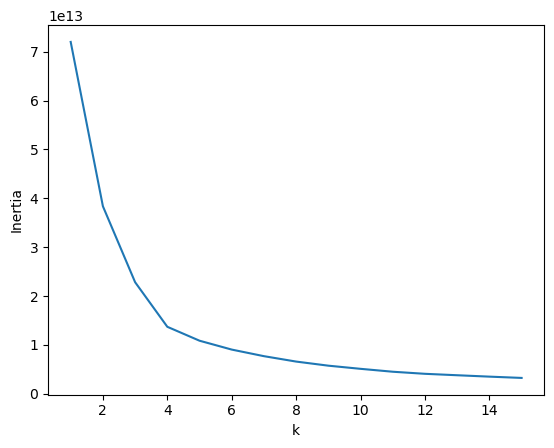

In [8]:
inertiaArr = np.array(inertiaLst).transpose()
plt.plot(inertiaArr[0], inertiaArr[1])
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [10]:
kVal = 4                               #4 is chosen as per the elbow method
kmeans = KMeans(n_clusters=kVal, n_init=10)
kmeans.fit(xDf)
accuracy = accuracy_score(inpDf['churn'], kmeans.labels_)
print(f'Accuracy: {accuracy}')

C:\Users\emsfl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 0.2367


In [37]:
xDf['label'] = kmeans.labels_
outDf = pd.concat((xDf, inpDf['churn']), axis=1)
print(outDf)

       credit_score  isCtry1  isCtry2  isFemale  age  tenure    balance  \
id                                                                        
2381            619        0        1         1   42       2       0.00   
2382            608        0        0         1   41       1   83807.86   
2383            502        0        1         1   42       8  159660.80   
2384            699        0        1         1   39       1       0.00   
2385            850        0        0         1   43       2  125510.82   
...             ...      ...      ...       ...  ...     ...        ...   
12376           771        0        1         0   39       5       0.00   
12377           516        0        1         0   35      10   57369.61   
12378           709        0        1         1   36       7       0.00   
12379           772        1        0         0   42       3   75075.31   
12380           792        0        1         1   28       4  130142.79   

       products_number  

In [38]:
outDf.to_csv(inPath + 'outFle_BCCP.csv')

In [11]:
# To check the predicting power of the k-means when it generates classes
kVal = 4      
kmeans = KMeans(n_clusters=kVal)
kmeans.fit(xDf)
accuracy = accuracy_score(inpDf['churn'], kmeans.labels_)
print(f'Accuracy: {accuracy}')

C:\Users\emsfl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 0.2654
